# Pretrained CNN classification

We use a pretrained CNN to classify images into ImageNet classes.

In [1]:
import numpy as np
from pathlib import Path
from PIL import Image
import torch

from lib.imagenet_classes import idx2label
from lib.plots import plot_transformed_val_input
from lib.cnn_classifiers import val_transform, get_cnn

In [3]:
from ipywidgets import interact


soda_imgs = sorted(
    str(img_path)
    for img_path in Path('data/sodas/query/').glob('**/*.jpg')
)

def classify_img(model_name, img_path, pretrained=True):
    model = get_cnn(model_name, pretrained)
    model.eval()

    im = Image.open(img_path)
    print('Original shape:', np.array(im).shape)

    # Transform the image
    x = val_transform(im)
    print('Shape after transform:', x.shape)

    plot_transformed_val_input(im)

    # Add batch dimension
    x = x.unsqueeze(0)
    print('Input shape:', x.shape)

    # Pass through model
    with torch.no_grad():
        y = model(x)
    print('Output shape:', y.shape)

    # Remove batch dimension
    y = y.squeeze()
    print('Squeezed output shape:', y.shape)

    # Softmax to get procentual scores
    y = torch.nn.functional.softmax(y, dim=0)

    # Get top 10 matches
    print()
    top_10_idxs = y.argsort(descending=True)[:10].numpy()
    top_10 = [f'{idx2label[idx]} ({y[idx]*100:.1f}%)'
              for idx in top_10_idxs]
    
    print('Top 10 matches:\n', '\n'.join([f'\t{i + 1}) {label}' for i, label in enumerate(top_10)]))

Original shape: (2048, 1600, 3)
Shape after transform: torch.Size([3, 224, 224])
Input shape: torch.Size([1, 3, 224, 224])
Output shape: torch.Size([1, 1000])
Squeezed output shape: torch.Size([1000])

Top 10 matches:
 	1) punching bag, punch bag, punching ball, punchball (40.4%)
	2) pop bottle, soda bottle (26.8%)
	3) water bottle (8.1%)
	4) red wine (7.8%)
	5) cocktail shaker (4.4%)
	6) beer bottle (2.6%)
	7) wine bottle (1.5%)
	8) knee pad (1.0%)
	9) soap dispenser (1.0%)
	10) perfume, essence (0.5%)


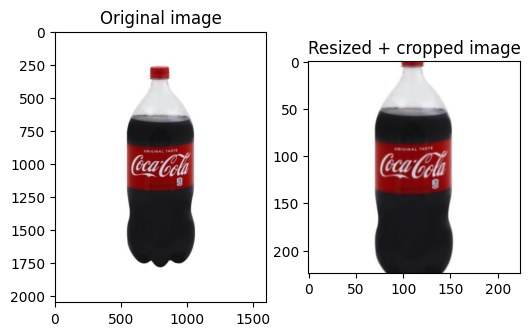

In [10]:
classify_img(
    model_name='alexnet',   # 'alexnet', 'vgg19', 'inception_v3', 'resnet50'
    img_path=soda_imgs[1],  # 0 to 79
    pretrained=True         # True, False
)